### Imports

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cvxpy as cp

### Generating the Random Dataset

In [2]:
# We first generate a random dataset with number of features (m = 10) and number of instances (n = 100)
# We also generate a random label vector y \in {-1,1}

n = 100 # Number of instances
m = 10  # Number of Features 

X = np.random.rand(n,m) 
y = np.random.rand(n) # n-dimensional vector
ybin = [(int(yi >= 0.5) - int(yi < 0.5)) for yi in y]
y = np.array(ybin)
w = np.random.rand(m, 1) # m-dimensional vector
print(w.shape)
print(X.shape)
print(y.shape)

(10, 1)
(100, 10)
(100,)


# Simple Loop Code Function Implementations

### Least Squares Implementation

In [3]:
def LeastSquaresNaive(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient

    f = 0

    wx_dot_product = np.zeros((n,1))
    for i in range(n):
        for j in range(m):
            wx_dot_product[i] += X[i][j]*w[j]

    y_pred = wx_dot_product

    for i in range(n):
        f += (y[i] - y_pred[i])**2 

    gradients = np.zeros((m,1))
    for i in range(n):
        error = -1*(y[i] - y_pred[i])
        for j in range(m):
            gradients[j] += 2*X[i][j]*error
        
    
    g = gradients
    return [f, g]     

In [4]:
start = time.time()
[f,g] = LeastSquaresNaive(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.01447296142578125
Function value = [700.39437512]
Printing Gradient:
[[246.08596573]
 [263.79144582]
 [264.50243635]
 [251.3987113 ]
 [239.06945284]
 [234.57569128]
 [246.53927256]
 [243.50372236]
 [242.71380947]
 [247.87591939]]


### Hinge Loss Implementation

In [5]:
def HingeLossNaive(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient

    loss = 0
    grad = np.zeros_like(w)
    
    for i in range(n):
        score = np.dot(X[i], w)
        margin = 1 - y[i] * score
        if margin > 0:
            loss += margin
            grad += -y[i] * X[i][:, np.newaxis]
    
    return loss, grad

In [6]:
start = time.time()
[f,g] = HingeLossNaive(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.0018537044525146484
Function value = [169.18997358]
Printing Gradient:
[[24.35699875]
 [28.35824296]
 [28.10514714]
 [27.1020723 ]
 [21.0561016 ]
 [24.10944253]
 [23.85134352]
 [25.73908041]
 [22.65900235]
 [24.73549558]]


### BinaryCrossEntropy Loss Function Implementation

In [7]:
def BCELoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient

    f = 0
    g = np.zeros_like(w)
    epsilon = 1e-5

    for i in range(n):
        z = np.dot(X[i], w)
        y_pred = 1 / (1 + np.exp(-z))
        f += -y[i] * np.log(y_pred + epsilon) - (1 - y[i]) * np.log(1 - y_pred + epsilon)

        for j in range(len(w)):
            g[j] += (y_pred - y[i]) * X[i][j]

    return [f, g]    

In [8]:
start = time.time()
[f,g] = BCELoss(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.01504826545715332
Function value = [246.11076198]
Printing Gradient:
[[44.49625684]
 [51.99796182]
 [51.73546058]
 [49.83973701]
 [38.69804917]
 [43.61676651]
 [43.77230221]
 [46.71879468]
 [41.57474206]
 [45.40612799]]


## Scalability of the Naive losses Implementation code

In [21]:
n = 100
m = 10000

X = np.random.rand(n,m)
y = np.random.rand(n)
ybin = [(int(yi >= 0.5) - int(yi < 0.5)) for yi in y]
y = np.array(ybin)
w = np.random.rand(m, 1)

start = time.time()
[f,g] = BCELoss(w,X,y,1)
end = time.time()
print("BCE Loss")
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

start = time.time()
[f,g] = LeastSquaresNaive(w,X,y,1)
end = time.time()
print("Least Square")
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

start = time.time()
[f,g] = HingeLossNaive(w,X,y,1)
end = time.time()
print("Hinge Loss")
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

BCE Loss
Time Taken = 3.783210277557373
Function value = [1174.31841743]
Printing Gradient:
[[45.87503311]
 [51.53564551]
 [54.28228904]
 ...
 [59.20552889]
 [48.05943969]
 [49.48864175]]
Least Square
Time Taken = 4.774887800216675
Function value = [6.10573224e+08]
Printing Gradient:
[[240155.74429839]
 [248933.31001235]
 [240545.93372712]
 ...
 [275145.17018308]
 [227013.28558881]
 [253412.0389239 ]]
Hinge Loss
Time Taken = 0.0030689239501953125
Function value = [126047.22991726]
Printing Gradient:
[[22.93751656]
 [25.76782275]
 [27.14114452]
 ...
 [29.60276444]
 [24.02971984]
 [24.74432088]]


# Vectorized Version Function Implementations

### LeastSquares Implementation

In [9]:
def LeastSquaresVec(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient

    y = y.reshape((n,1))
    y_pred = np.dot(X, w)
    f = np.sum((y - y_pred)**2)
    g = -2 * np.dot(X.T, (y - y_pred))
    
    return [f, g]     

In [10]:
start = time.time()
[f,g] = LeastSquaresVec(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.0003132820129394531
Function value = 700.3943751213081
Printing Gradient:
[[246.08596573]
 [263.79144582]
 [264.50243635]
 [251.3987113 ]
 [239.06945284]
 [234.57569128]
 [246.53927256]
 [243.50372236]
 [242.71380947]
 [247.87591939]]


### Hinge Loss Implementation

In [11]:
def HingeLossVec(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient
    y = y.reshape((n,1))
    y_pred = X @ w
    f = np.sum((1 >= y_pred * y) * (1 - y_pred*y))
    g = - X.T @ ((1 >= y_pred * y) * y)
    return [f, g]

In [12]:
start = time.time()
[f,g] = HingeLossVec(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.0003972053527832031
Function value = 169.1899735793913
Printing Gradient:
[[24.35699875]
 [28.35824296]
 [28.10514714]
 [27.1020723 ]
 [21.0561016 ]
 [24.10944253]
 [23.85134352]
 [25.73908041]
 [22.65900235]
 [24.73549558]]


### Binary Cross Entropy Loss Implementation

In [13]:
def BCELossVec(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient

    y = y.reshape((100,1))
    y_pred = 1 / (1 + np.exp(-np.dot(X, w)))
    epsilon = 1e-5

    f = (-1) * np.sum(y * np.log(y_pred+epsilon) + (1 - y) * np.log(1 - y_pred+epsilon))
    g = np.dot(X.T, (y_pred - y))

    return [f, g]     

In [14]:
start = time.time()
[f,g] = BCELossVec(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.00041413307189941406
Function value = 246.1107619802254
Printing Gradient:
[[44.49625684]
 [51.99796182]
 [51.73546058]
 [49.83973701]
 [38.69804917]
 [43.61676651]
 [43.77230221]
 [46.71879468]
 [41.57474206]
 [45.40612799]]


## Scalability of Vecorized Loss Function Implementations

In [22]:
n = 100
m = 10000

X = np.random.rand(n,m)
y = np.random.rand(n)
ybin = [(int(yi >= 0.5) - int(yi < 0.5)) for yi in y]
y = np.array(ybin)
w = np.random.rand(m, 1)

start = time.time()
[f,g] = BCELossVec(w,X,y,1)
end = time.time()
print("BCE Loss")
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

start = time.time()
[f,g] = LeastSquaresVec(w,X,y,1)
end = time.time()
print("Least Square")
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

start = time.time()
[f,g] = HingeLossVec(w,X,y,1)
end = time.time()
print("Hinge Loss")
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

BCE Loss
Time Taken = 0.012525081634521484
Function value = 990.1114499881398
Printing Gradient:
[[34.88522231]
 [46.97802992]
 [42.33309702]
 ...
 [33.42934925]
 [46.60699287]
 [51.79023552]]
Least Square
Time Taken = 0.018811702728271484
Function value = 625547254.0325726
Printing Gradient:
[[223172.84302155]
 [248278.9218498 ]
 [249532.86981183]
 ...
 [235891.86801806]
 [259136.42645296]
 [266286.47460967]]
Hinge Loss
Time Taken = 0.030467510223388672
Function value = 107469.8198738928
Printing Gradient:
[[17.44261115]
 [23.48901496]
 [21.16654851]
 ...
 [16.71467463]
 [23.30349644]
 [25.89511776]]


# CVXPY version Function Implementations
CVXPY is an open source Python-embedded modeling language for convex optimization problems. Link: https://www.cvxpy.org/

### LeastSquares Implementation

In [15]:
def LeastSquaresCVXPY(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient
    y = y.reshape((n,1))
    expression = cp.sum_squares((X @ w) - y) 
    Problem = cp.Problem(cp.Minimize(expression))
    f = expression.value
    g = 2 * X.T @ ((X @ w) - y)
    
    result = Problem.solve()
    
    return [f, g]

In [16]:
start = time.time()
[f,g] = LeastSquaresCVXPY(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.0009677410125732422
Function value = 700.3943751213081
Printing Gradient:
[[246.08596573]
 [263.79144582]
 [264.50243635]
 [251.3987113 ]
 [239.06945284]
 [234.57569128]
 [246.53927256]
 [243.50372236]
 [242.71380947]
 [247.87591939]]


In [17]:
def HingeLossCVXPY(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient

    y = y.reshape((n,1))
    expression = cp.sum(cp.pos(1 - cp.multiply(y, X @ w)))
    Problem = cp.Problem(cp.Minimize(expression))
    f = expression.value
    g = - X.T @ ((1 >= (X @ w) * y) * y)
    
    result = Problem.solve()
    return [f, g]

In [18]:
start = time.time()
[f,g] = HingeLossCVXPY(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.003190755844116211
Function value = 169.1899735793913
Printing Gradient:
[[24.35699875]
 [28.35824296]
 [28.10514714]
 [27.1020723 ]
 [21.0561016 ]
 [24.10944253]
 [23.85134352]
 [25.73908041]
 [22.65900235]
 [24.73549558]]


### Binary Cross Entropy Loss Function Implementation

In [19]:
def BCELossCVXPY(w, X, y, lam):
    # Computes the cost function for all the training samples
    # where f is the function value and g is the gradient

    y = y.reshape((n,1))
    y_pred = 1 / (1 + np.exp(-np.dot(X, w)))
    epsilon = 1e-5

    expression = -1 * (cp.sum(cp.multiply(y, cp.log(y_pred+epsilon))) +  cp.sum(cp.multiply((1-y), cp.log(1-y_pred+epsilon))))
    Problem = cp.Problem(cp.Minimize(expression))
    f = expression.value
    g = np.dot(X.T, (y_pred - y))
    result = Problem.solve()
    
    return [f, g]

In [20]:
start = time.time()
[f,g] = BCELossCVXPY(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value = " + str(f))
print("Printing Gradient:")
print(g)

Time Taken = 0.002610921859741211
Function value = 246.11076198022542
Printing Gradient:
[[44.49625684]
 [51.99796182]
 [51.73546058]
 [49.83973701]
 [38.69804917]
 [43.61676651]
 [43.77230221]
 [46.71879468]
 [41.57474206]
 [45.40612799]]


## Scalability of CVXPY based Loss function implementations

In [23]:
n = 100
m = 10

X = np.random.rand(n,m)
y = np.random.rand(n)
ybin = [(int(yi >= 0.5) - int(yi < 0.5)) for yi in y]
y = np.array(ybin)
w = np.random.rand(m, 1)

start = time.time()
[f1,g1] = BCELossCVXPY(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value Naive = " + str(f1))
print("Printing Gradient Naive:")
print(g1)

start = time.time()
[f2,g2] = LeastSquaresCVXPY(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value For = " + str(f2))
print("Printing Gradient For:")
print(g2)

start = time.time()
[f2,g2] = HingeLossCVXPY(w,X,y,1)
end = time.time()
print("Time Taken = " + str(end - start))
print("Function value For = " + str(f2))
print("Printing Gradient For:")
print(g2)

Time Taken = 0.0023767948150634766
Function value Naive = 360.2825810183647
Printing Gradient Naive:
[[54.16859004]
 [50.05754674]
 [57.33258681]
 [60.04748361]
 [56.03230846]
 [63.96894559]
 [55.37796106]
 [57.10077268]
 [49.14334157]
 [56.43406557]]
Time Taken = 0.0006554126739501953
Function value For = 1178.2021799915833
Printing Gradient For:
[[334.10641673]
 [313.68187155]
 [341.73273745]
 [360.80503111]
 [343.65603772]
 [384.38880223]
 [347.64326882]
 [337.60304982]
 [299.61982783]
 [331.33122162]]
Time Taken = 0.0012655258178710938
Function value For = 233.50455569266032
Printing Gradient For:
[[28.20992345]
 [26.23090543]
 [29.8494993 ]
 [31.19087368]
 [29.26032362]
 [33.25945864]
 [28.86294694]
 [29.62195518]
 [25.69554342]
 [29.55399358]]


# Compare the losses with Graph

Assumed that graph of various times is required for different losses from various methods. Since losses remain the same for various methods like naive, vectorized and cvxpy for different functions

In [24]:
def BCELossFun(w, X, y, lam):
    error_ll = []
    start = time.time()
    [f1,g1] = BCELoss(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    start = time.time()
    [f1,g1] = BCELossVec(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    start = time.time()
    [f1,g1] = BCELossCVXPY(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    return error_ll

def LeastSquaresFun(w, X, y, lam):
    error_ll = []
    start = time.time()
    [f1,g1] = LeastSquaresNaive(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    start = time.time()
    [f1,g1] = LeastSquaresVec(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    start = time.time()
    [f1,g1] = LeastSquaresCVXPY(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    return error_ll

def HingeLossFun(w, X, y, lam):
    error_ll = []
    start = time.time()
    [f1,g1] = HingeLossNaive(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    start = time.time()
    [f1,g1] = HingeLossVec(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    start = time.time()
    [f1,g1] = HingeLossCVXPY(w,X,y,1)
    end = time.time()
    error_ll.append(end-start)
    return error_ll

def plot_errors(error_ll, error_ls, error_hl, num):
    plt.title('Plot of Losses vs times taken for various methods')
    plt.plot(num, error_ll, label="BCE Loss")
    plt.plot(num, error_ls, label="Least Squares")
    plt.plot(num, error_hl, label="Hinge Loss")
    plt.legend()
    plt.show()
    return

various times of loss functions executions
BCE Loss: [6.837799072265625, 0.057822227478027344, 0.037720680236816406]
LS Loss: [9.081407070159912, 0.041094303131103516, 0.10141181945800781]
hinge loss: [0.004794120788574219, 0.016962528228759766, 0.04466080665588379]


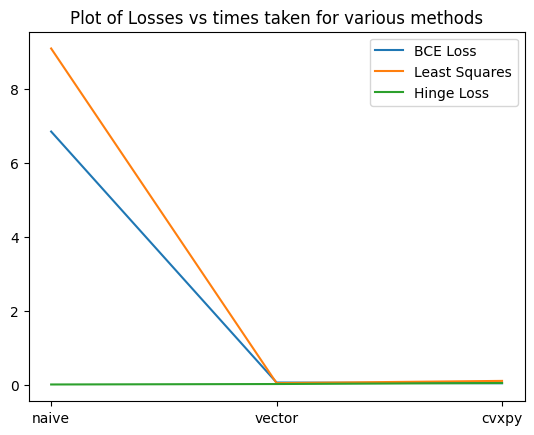

In [25]:
n = 100
m = 10000

X = np.random.rand(n,m)
y = np.random.rand(n)
ybin = [(int(yi >= 0.5) - int(yi < 0.5)) for yi in y]
y = np.array(ybin)
w = np.random.rand(m, 1)

error_ll = BCELossFun(w,X,y,1)
error_ls = LeastSquaresFun(w,X,y,1)
error_hl = HingeLossFun(w,X,y,1)

print("various times of loss functions executions")
print("BCE Loss:", error_ll)
print("LS Loss:", error_ls)
print("hinge loss:", error_hl)
plot_errors(error_ll, error_ls, error_hl, ['naive','vector', 'cvxpy'])